In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm, tqdm_pandas
from tqdm._tqdm_notebook import tqdm_notebook

In [21]:
older = pd.read_csv('news_dataset/older_articles.csv')
older = older.rename({'text':'content'}, axis=1)
older.head()

,date,content
0,1990-10-28 05:00:00+00:00,AS if Long Island did not have enough of its o...
1,1990-02-09 05:00:00+00:00,"Paring More Than PotatoesAll over town, it see..."
2,1990-03-18 05:00:00+00:00,In some ways the case of Edward H. Winter is a...
3,1990-12-11 05:00:00+00:00,The scene inside the showroom at Saturn of Sch...
4,1990-06-24 05:00:00+00:00,THE television producer asked him for just fiv...


In [22]:
print(older.shape)

(9591, 2)


In [23]:
from textblob import TextBlob



In [24]:
def get_text_sentiment(text):
    try:
        tb = TextBlob(text)
        sentences = np.array(tb.sentences)
        if sentences.dtype != np.object:
            return np.nan
        
        vfunc = np.vectorize(lambda x: x.sentiment.polarity)
        sentences = vfunc(sentences)
        return np.average(sentences)
    except Exception:
        return np.nan

In [25]:
%%timeit
get_text_sentiment(older.iloc[0, 0])

109 µs ± 6.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [26]:
def process_chunk(chunk, out_file):
    tqdm_notebook.pandas()
    chunk.date = chunk.date.apply(lambda x: x if '"' not in x  else x.split('"')[0])
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk = chunk.set_index('date')
    chunk = chunk.groupby(pd.Grouper(freq='M')).apply(lambda group_df: group_df.sample(22) if len(group_df) >= 22 else group_df ).aggregate(lambda x:x)
    chunk.index = chunk.index.get_level_values(0)
    counts = chunk.groupby(pd.Grouper(freq='M')).count()
    chunk['content'] = chunk['content'].progress_apply(get_text_sentiment)

    
    chunk.insert(chunk.shape[1], 'count', counts)
    chunk = chunk.groupby(pd.Grouper(freq='M')).aggregate(np.average)
    print(out_file)
    chunk.dropna().to_csv(out_file)
    

In [27]:
process_chunk(older, 'older_sentiment.csv')


older_sentiment.csv


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


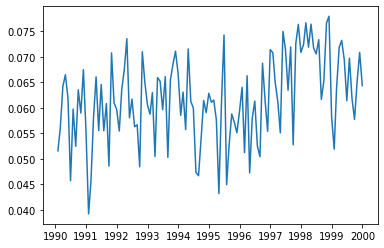

In [15]:
plt.plot(monthly_avg)

In [3]:
monthly_avg.to_csv('monthly_average.csv')

NameError: name 'monthly_avg' is not defined

In [53]:
dataset_iterator = pd.read_csv('news_dataset/data.csv', chunksize=10000)

In [55]:
idx = 0
for chunk in tqdm(dataset_iterator):
    chunk = chunk.dropna()
    idx += 1
    filename = 'news_dataset/chunk{}.csv'.format(idx)
    process_chunk(chunk, filename)



0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/arattel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1it [00:27, 27.85s/it]


news_dataset/chunk1.csv




2it [00:37, 22.51s/it]


news_dataset/chunk2.csv




3it [00:43, 17.40s/it]


news_dataset/chunk3.csv




4it [00:47, 13.56s/it]


news_dataset/chunk4.csv




5it [00:58, 12.59s/it]


news_dataset/chunk5.csv




6it [01:05, 10.85s/it]


news_dataset/chunk6.csv




7it [01:13, 10.05s/it]


news_dataset/chunk7.csv




8it [01:19,  9.00s/it]


news_dataset/chunk8.csv




9it [01:28,  8.98s/it]


news_dataset/chunk9.csv




10it [01:38,  9.31s/it]


news_dataset/chunk10.csv




11it [01:43,  8.03s/it]


news_dataset/chunk11.csv




12it [01:51,  7.83s/it]


news_dataset/chunk12.csv




13it [01:59,  7.87s/it]


news_dataset/chunk13.csv




14it [02:08,  8.23s/it]


news_dataset/chunk14.csv




15it [02:15,  7.78s/it]


news_dataset/chunk15.csv




16it [02:28,  9.57s/it]


news_dataset/chunk16.csv




17it [02:43, 11.16s/it]


news_dataset/chunk17.csv




18it [03:46, 26.54s/it]


news_dataset/chunk18.csv




19it [03:56, 21.62s/it]


news_dataset/chunk19.csv




20it [04:05, 18.08s/it]


news_dataset/chunk20.csv




21it [04:16, 12.20s/it]


news_dataset/chunk21.csv
